# Exploratory Analysis of datasets
In this Jupyter Notebook you will find exploratory analysis of dataset of an Insurance company based in the USA.

First, we import the libraries and the dataset that we will need.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Insurance file
We import the file.

In [18]:
ins = pd.read_csv('../Data/Clean_data/Clean_Insurance_USA.csv', index_col = 0)

In [19]:
ins['Number_Open_Complaints'] = ins['Number_Open_Complaints'].apply(lambda x: 0 if x == 0 else 1)

Let's see how many customers from each State of the USA there are.

In [20]:
pd.DataFrame(ins['State'].value_counts(ascending = False, normalize = True)*100)

,State
California,34.486534
Oregon,28.476024
Arizona,18.644624
Nevada,9.656229
Washington,8.736589


Aproximately 80% of the clients come from California, Oregon and Arizona.

In [21]:
pd.DataFrame(ins['Location'].value_counts(ascending = False, normalize = True)*100)

,Location
Suburban,63.269104
Rural,19.410992
Urban,17.319904


In [97]:
ins.groupby('Location')['Number_Open_Complaints'].sum()*100/ins.groupby('Location')['Number_Open_Complaints'].count()

Location
Rural       21.714608
Suburban    20.574494
Urban       19.469027
Name: Number_Open_Complaints, dtype: float64

In [95]:
ins.groupby('Location')['Number_Open_Complaints'].count()

Location
Rural       1773
Suburban    5779
Urban       1582
Name: Number_Open_Complaints, dtype: int64

63% of clients live in Suburban areas.

In [22]:
pd.DataFrame(ins['Gender'].value_counts(ascending = False, normalize = True)*100)

,Gender
F,50.996278
M,49.003722


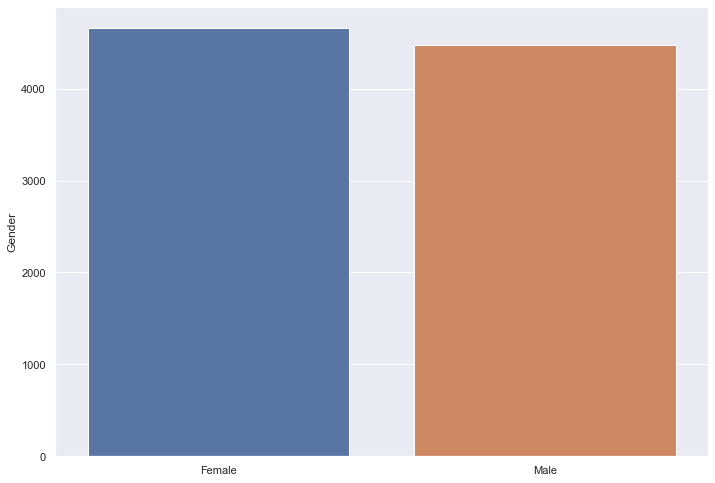

In [90]:
sns.barplot(['Female', 'Male'], ins.Gender.value_counts())

51% of our data is Female.

In [98]:
ins[['Gender', 'Number_Open_Complaints']].groupby('Gender').sum()*100/ins[['Gender', 'Number_Open_Complaints']].groupby('Gender').count()

,Number_Open_Complaints
Gender,
F,20.888793
M,20.308311


In [24]:
gender = ins[['Gender', 'Number_Open_Complaints']].groupby('Gender').sum()

There is not so much difference between female and male in terms of number of accidents.

In [25]:
pd.DataFrame(ins['Coverage'].value_counts(ascending = False, normalize = True)*100)

,Coverage
Basic,60.959054
Extended,30.019707
Premium,9.021239


60% of clients use the basic coverage products whereas 30% and 9% use Extended and Premium respectively.

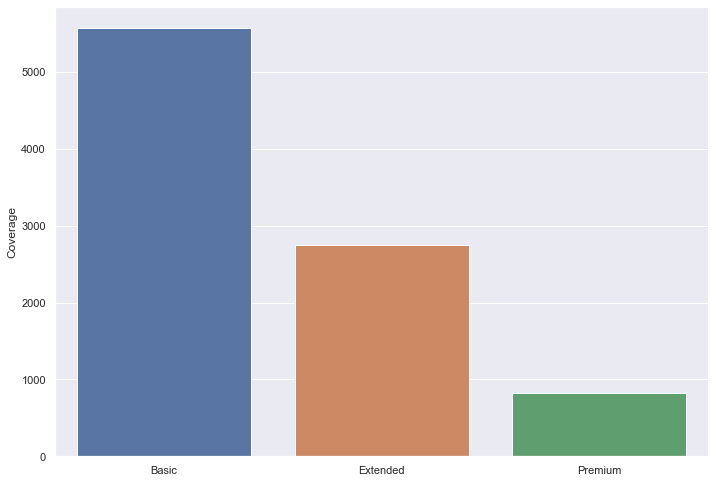

In [100]:
sns.barplot(ins.Coverage.value_counts().index, ins.Coverage.value_counts())

In [26]:
#Is people that use basic more prone to have accidents than those who use a Premium?
ins.groupby('Coverage')['Number_Open_Complaints'].sum()*100/ins.groupby('Coverage')['Number_Open_Complaints'].count()

Coverage
Basic       20.761494
Extended    20.860686
Premium     18.689320
Name: Number_Open_Complaints, dtype: float64

In [101]:
ins.groupby('Education')['Number_Open_Complaints'].sum()*100/ins.groupby('Education')['Number_Open_Complaints'].count()

Education
Bachelor                21.069869
College                 21.111526
Doctor                  20.467836
High School or Below    19.717773
Master                  20.242915
Name: Number_Open_Complaints, dtype: float64

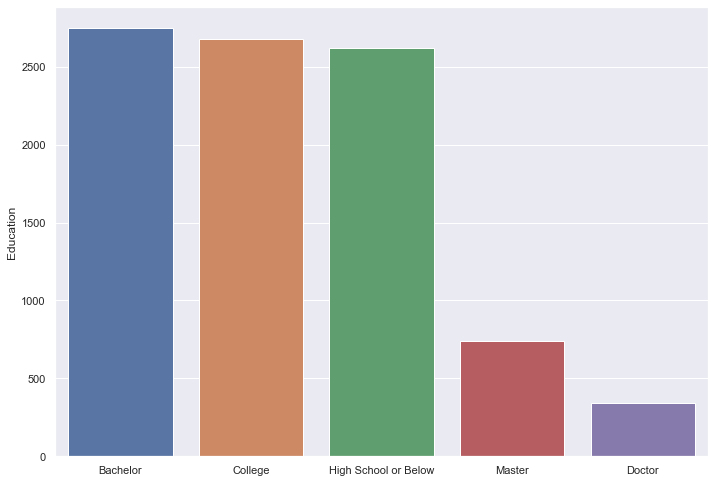

In [91]:
sns.barplot(ins.Education.value_counts().index, ins.Education.value_counts())

In [86]:
test = pd.DataFrame(ins.groupby(['Education','Coverage'])['Customer','Number_Open_Complaints'].agg({'Customer':'count','Number_Open_Complaints':'sum'}))

In [87]:
test['Percentage_Accident'] = test['Number_Open_Complaints']*100/test['Customer']

In [88]:
test

Customer  Number_Open_Complaints  \
Education            Coverage                                     
Bachelor             Basic         1729                     376   
                     Extended       769                     150   
                     Premium        250                      53   
College              Basic         1628                     337   
                     Extended       827                     186   
                     Premium        226                      43   
Doctor               Basic          200                      38   
                     Extended       122                      27   
                     Premium         20                       5   
High School or Below Basic         1561                     318   
                     Extended       800                     156   
                     Premium        261                      43   
Master               Basic          450                      87   
                     Extended       224                      53   
                     Premium         67                      10   

                               Percentage_Accident  
Education            Coverage                       
Bachelor             Basic               21.746674  
                     Extended            19.505852  
                     Premium             21.200000  
College              Basic               20.700246  
                     Extended            22.490931  
                     Premium             19.026549  
Doctor               Basic               19.000000  
                     Extended            22.131148  
                     Premium             25.000000  
High School or Below Basic               20.371557  
                     Extended            19.500000  
                     Premium             16.475096  
Master               Basic               19.333333  
                     Extended            23.660714  
                     Premium             14.925373

In [30]:
#Number of accidents by Type of car
pd.DataFrame(ins.groupby('Car_Type')['Number_Open_Complaints'].sum()*100/ins.groupby('Car_Type')['Number_Open_Complaints'].count())

,Number_Open_Complaints
Car_Type,
Four-Door Car,21.380654
Luxury Car,22.085890
Luxury SUV,23.369565
SUV,19.543430
Sports Car,19.008264
Two-Door Car,19.724284


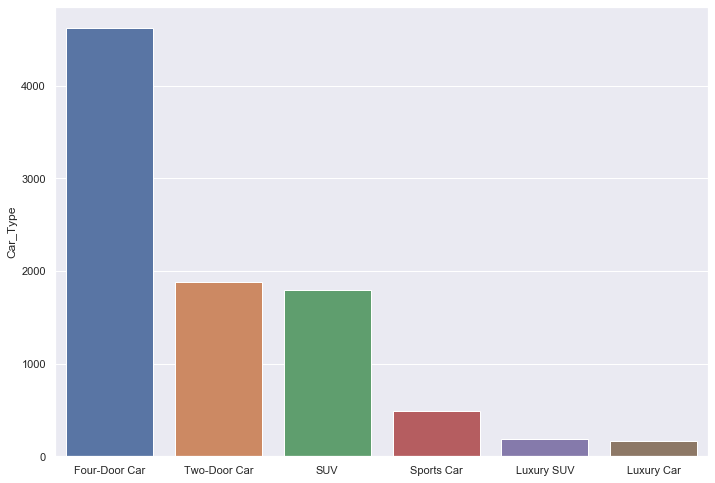

In [102]:
sns.barplot(ins.Car_Type.value_counts().index, ins.Car_Type.value_counts())

In [31]:
pd.DataFrame(ins.groupby('Policy_Type')['Number_Open_Complaints'].sum()*100/ins.groupby('Policy_Type')['Number_Open_Complaints'].count())

,Number_Open_Complaints
Policy_Type,
Corporate Auto,20.426829
Personal Auto,20.713023
Special Auto,19.576720


In [103]:
#Number of accidents by Size of car
pd.DataFrame(ins.groupby('Car_Size')['Number_Open_Complaints'].sum()*100/ins.groupby('Car_Size')['Number_Open_Complaints'].count())

,Number_Open_Complaints
Car_Size,
Large,20.507400
Medsize,20.485679
Small,21.088435


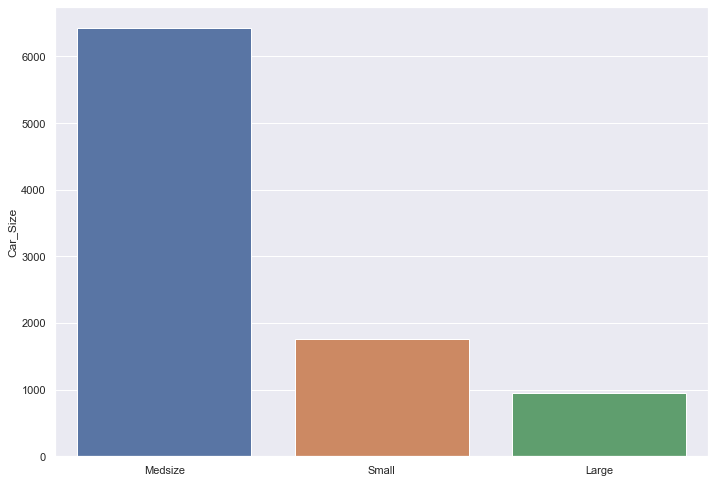

In [104]:
sns.barplot(ins.Car_Size.value_counts().index, ins.Car_Size.value_counts())